# **Project 1: Data Analysis Project**

**By Christian Hjorth Hansen and Jacob Mai Kaaber**

## **Introduction**

In this project we look at the stock prices of the 3 biggest energy firms world wide. These 3 firms are *Exxon Mobile Corporation*, *Chevron Corporation* and *Royal Dutch Shell* (It should be mentioned, that due to the fact that Royal Dutch Shell has split their stocks in A and B, we only look at the B shares since they get traded more often). 
 
We will describe the devolpment of these 3 firms stock prices by presenting data visually and using methods from descreptive economics.

## **Importing packages**

We start by importing all the necessary packages. 

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
import pandas_datareader
import ipywidgets as widgets

## **Pick start- and enddate**

Here we have chosen the 1st of January 2016 as the start date and the 20th of March as the end date. 

In [2]:
start = datetime.datetime(2016,1,1)
end   = datetime.datetime(2019,3,20)

## **Importing stock prices**

We are going to import the data in 3 section, one for each firm. The data is being imported as daily data from IEX.

### Exxon Mobile Corporation

**First** we import the data.

In [3]:
XOM = pandas_datareader.iex.daily.IEXDailyReader('XOM', start, end).read()

**Next** we drop the variables, which we aren't going to use.

In [4]:
del XOM['open']
del XOM['high']
del XOM['low']

**Next** we add 3 new variable, one with the company name, one which shows the closing prices demeaned and the last variable shows the precentage change in the closing price.

In [5]:
XOM['firm'] = 'Exxon Mobile'
XOM['close_demeaned'] = XOM.groupby('firm')['close'].transform(lambda x: x - x.mean())
XOM['percentage_change, %'] = ((XOM.close - XOM.close.shift(1)) / XOM.close.shift(1))*100

**Lastly** we convert the date from index to dates using datetime

In [6]:
XOM.index = pd.to_datetime(XOM.index)

To test that the code works as expected we print the first 5 observations.

In [7]:
XOM.head()

,close,volume,firm,close_demeaned,"percentage_change, %"
date,,,,,
2016-01-04,67.8249,20400084,Exxon Mobile,-8.975557,NaN
2016-01-05,68.4028,11993500,Exxon Mobile,-8.397657,0.852047
2016-01-06,67.8337,18826900,Exxon Mobile,-8.966757,-0.831983
2016-01-07,66.7479,21263761,Exxon Mobile,-10.052557,-1.600679
2016-01-08,65.3995,19033628,Exxon Mobile,-11.400957,-2.020138


### Chevron Corporation

**First** we import the data.

In [8]:
CVX = pandas_datareader.iex.daily.IEXDailyReader('CVX', start, end).read()

**Next** we drop the variables, we are not going to use.

In [9]:
del CVX['open']
del CVX['high']
del CVX['low']

**Next** we add a new variable with the company name.

In [10]:
CVX['firm'] = 'Chevron'
CVX['close_demeaned'] = CVX.groupby('firm')['close'].transform(lambda x: x - x.mean())
CVX['percentage_change, %'] = ((CVX.close - CVX.close.shift(1)) / CVX.close.shift(1))*100

**Lastly** we convert the date from index to dates using datetime

In [11]:
CVX.index = pd.to_datetime(CVX.index)

And to test that the code works as expected we print the first 5 observations.

In [12]:
CVX.head()

,close,volume,firm,close_demeaned,"percentage_change, %"
date,,,,,
2016-01-04,77.9890,11397278,Chevron,-26.496242,NaN
2016-01-05,78.6561,7883427,Chevron,-25.829142,0.855377
2016-01-06,75.5488,14511395,Chevron,-28.936442,-3.950488
2016-01-07,72.8717,15368822,Chevron,-31.613542,-3.543537
2016-01-08,72.0905,11891638,Chevron,-32.394742,-1.072021


### Royal Dutch Shell (Shares B)

**First** we import the data

In [13]:
RDS = pandas_datareader.iex.daily.IEXDailyReader('RDS.B', start, end).read()

**Next** we drop the variables, we are not going to use.

In [14]:
del RDS['open']
del RDS['high']
del RDS['low']

**Next** we add a new variable with the company name.

In [15]:
RDS['firm'] = 'Shell'
RDS['close_demeaned'] = RDS.groupby('firm')['close'].transform(lambda x: x - x.mean())
RDS['percentage_change, %'] = ((RDS.close - RDS.close.shift(1)) / RDS.close.shift(1))*100

**Lastly** we convert the date from index to dates using datetime

In [16]:
RDS.index = pd.to_datetime(RDS.index)

And to test that the code works as expected we print the first 5 observations.

In [17]:
RDS.head()

,close,volume,firm,close_demeaned,"percentage_change, %"
date,,,,,
2016-01-04,38.2145,3602883,Shell,-17.043389,NaN
2016-01-05,37.8684,2445582,Shell,-17.389489,-0.905677
2016-01-06,36.4097,2052720,Shell,-18.848189,-3.852024
2016-01-07,34.6461,5699700,Shell,-20.611789,-4.843764
2016-01-08,32.7011,11210025,Shell,-22.556789,-5.613907


## **Combining the data sets**

**First** we combine the 3 data sets in one set called Top3_energy_stocks

In [18]:
Top3_energy_stocks = pd.concat([XOM,CVX,RDS])

And then we print the first 5 observations to test, whether the code works.

In [19]:
Top3_energy_stocks.head()

,close,volume,firm,close_demeaned,"percentage_change, %"
date,,,,,
2016-01-04,67.8249,20400084,Exxon Mobile,-8.975557,NaN
2016-01-05,68.4028,11993500,Exxon Mobile,-8.397657,0.852047
2016-01-06,67.8337,18826900,Exxon Mobile,-8.966757,-0.831983
2016-01-07,66.7479,21263761,Exxon Mobile,-10.052557,-1.600679
2016-01-08,65.3995,19033628,Exxon Mobile,-11.400957,-2.020138


## **Visualisations**

In this section we create 4 figures. One for the closing price, one for the closing price demeaned, one for the precentage growth and one for the volume. The first 3 figures shows the devolopments for each of the 3 firms. We added a widget, which allows the reader to choose which firms to consider (The widget is by default set to look at all 3 firms). The last figure shows the volume, which has been divided into the 5 weekdays. 

### Closing price

In [1]:
def Fig1():
    
    def fig(temp1, temp2, temp3):
        if temp1 == True:
            XOM.groupby('firm')['close'].plot(legend=True, color='green')
        if temp2 == True:
            CVX.groupby('firm')['close'].plot(legend=True, color='blue')
        if temp3 == True:
            RDS.groupby('firm')['close'].plot(legend=True, color='orange')

        plt.xlabel('Date')
        plt.ylabel('Dollars')
        plt.title('Figure 1: Closing price')

    widgets.interact(fig,
           temp1=widgets.Checkbox(description='Exxon', value=True, disabled=False),
           temp2=widgets.Checkbox(description='Chevron', value=True, disabled=False),
           temp3=widgets.Checkbox(description='Royal Dutch Shell', value=True, disabled=False),
        );

Fig1()

NameError: name 'widgets' is not defined

We note that Chevron has the highest stockprice in the period. We also see that both Shell's and Chevron's stockprice have increased in the period, while Exxon's stockprice has been more stable. All firms seems to follow the same trend, which is seen clearly illustrated during the first quarter of 2018, where all the stockprices fell simultaneously. 
They co-move to some extend, which - among other things - might be due to them operating in the same industri (Energy production). Some market shocks are reltated to specific industries, while other are more generel. This means that firms operating in same industries tend to covariate more than firms from different industries. Some individual shock occur as well, but all the big shocks seems to take effect across the firms.  

### Closing price demeaned

In [21]:
def Fig2():
    
    def fig(temp1, temp2, temp3):
        if temp1 == True:
            XOM.groupby('firm')['close_demeaned'].plot(legend=True, color='green')
        if temp2 == True:
            CVX.groupby('firm')['close_demeaned'].plot(legend=True, color='blue')
        if temp3 == True:
            RDS.groupby('firm')['close_demeaned'].plot(legend=True, color='orange')
        
        plt.xlabel('Date')
        plt.ylabel('Dollars')
        plt.title('Figure 2: Closing price demeaned')

    widgets.interact(fig,
           temp1=widgets.Checkbox(description='Exxon', value=True, disabled=False),
           temp2=widgets.Checkbox(description='Chevron', value=True, disabled=False),
           temp3=widgets.Checkbox(description='Royal Dutch Shell', value=True, disabled=False),
        );

Fig2()

interactive(children=(Checkbox(value=True, description='Exxon'), Checkbox(value=True, description='Chevron'), …

Here we clearly see that both Chevron's and Shell's stockprice has risen since 2016 and almost at the same level, but since Chevron's stocksprice is higher than Shell's, it means that Shell's stockprice has risen relativly more in the period. Exxon's stockprice is almost at the same level as in 2016, and it only fluctuates around its average.

### Percentage change in the closing price

In [22]:
XOM_C=XOM.copy()
XOM_C=XOM.dropna(subset=['percentage_change, %'])
CVX_C=CVX.copy()
CVX_C=CVX.dropna(subset=['percentage_change, %'])
RDS_C=RDS.copy()
RDS_C=RDS.dropna(subset=['percentage_change, %'])

def Fig3():
    
    def fig(temp1, temp2, temp3):
        if temp1 == True:
            XOM_C.groupby('firm')['percentage_change, %'].plot(legend=True, color='green')
        if temp2 == True:
            CVX_C.groupby('firm')['percentage_change, %'].plot(legend=True, color='blue')
        if temp3 == True:
            RDS_C.groupby('firm')['percentage_change, %'].plot(legend=True, color='orange')
        
        plt.xlabel('Date');
        plt.ylabel('Percent');
        plt.title('Figure 3: Percentage change in closing price');

    widgets.interact(fig,
           temp1=widgets.Checkbox(description='Exxon', value=True, disabled=False),
           temp2=widgets.Checkbox(description='Chevron', value=True, disabled=False),
           temp3=widgets.Checkbox(description='Royal Dutch Shell', value=True, disabled=False),
        );

Fig3()

interactive(children=(Checkbox(value=True, description='Exxon'), Checkbox(value=True, description='Chevron'), …

Looking at the percentage change we see that they all more or less comove. We also see that the percentage change in the stockprice for both Shell and Chevron lies slightly above 0, which is consistent with figure 1 and 2. In this figure we also see the outliers more clearly, and espicially the decrease in Shell's stockprice in medio 2016. 

### Volume grouped by weekdays

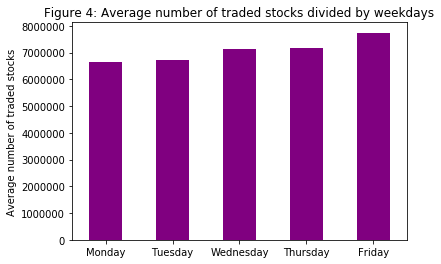

In [23]:
Top3_energy_stocks_C=Top3_energy_stocks.copy()
Top3_energy_stocks_C['Weekday'] = Top3_energy_stocks_C.index.weekday
ax1 = Top3_energy_stocks_C.groupby('Weekday')['volume'].mean().plot(kind='bar', color='purple') 
ax1.set_ylabel('Average number of traded stocks')
ax1.set_title('Figure 4: Average number of traded stocks divided by weekdays')
ax1.set_xlabel('')
plt.xticks(np.arange(5),('Monday','Tuesday','Wednesday','Thursday','Friday'), rotation='horizontal')
for txt in ax1.texts:
    txt.set_visible(False)

Here we see that the average number of traded stocks is rising through the week, which means that the number of traded stocks monday is less than the traded stocks friday. We also see that the average number of traded stocks on a weekday is approximately 7 billion.

## **Descriptive statistics**

First we define all of the statistical variables, that we are going to use to describe our dataset.

In [24]:
# First we find the number of observations (Remember that precentage change is missing the first value for each firm)
Observations=round(Top3_energy_stocks['close'].count(),0)

# Next we find the average
Avg_closing_price=round(Top3_energy_stocks['close'].mean(),2)
Avg_volume=round(Top3_energy_stocks['volume'].mean(),2)
Avg_closing_demeaned=round(Top3_energy_stocks['close_demeaned'].mean(),2)

In [25]:
# First we find the observations
Observations_XOM=round(XOM['close'].count(),0)

# Next we find the average (Here we notice that since we got precentage change, we need to use a formula to calculate the average precentage change)
Avg_closing_price_XOM=round(XOM['close'].mean(),2)
Avg_volume_XOM=round(XOM['volume'].mean(),2)
Avg_closing_demeaned_XOM=round(XOM['close_demeaned'].mean(),2)
Avg_precentage_change_XOM=round(((XOM.close[-1]/XOM.close[0])**(1/Observations_XOM)-1)*100,2)

# Next we calculate the standard diviation
Std_closing_price_XOM=round(XOM['close'].std(),2)
Std_volume_XOM=round(XOM['volume'].std(),2)
Std_close_demeaned_XOM=round(XOM['close_demeaned'].std(),2)

# Next we find the minimum value and which day this occured
Min_closing_price_XOM=round(XOM['close'].min(),2)
Min_volume_XOM=round(XOM['volume'].min(),2)
Min_close_demeaned_XOM=round(XOM['close_demeaned'].min(),2)

# Next we find the maximum value and which day this occured
Max_closing_price_XOM=round(XOM['close'].max(),2)
Max_volume_XOM=round(XOM['volume'].max(),2)
Max_close_demeaned_XOM=round(XOM['close_demeaned'].max(),2)

# And lastly we find the median, which we do by first finding the middle observation
XOM_median_obs=(Observations_XOM)//2
Median_closing_price_XOM=round(XOM.close[XOM_median_obs],2)
Median_volume_XOM=round(XOM.volume[XOM_median_obs],2)
Median_closing_demeaned_XOM=round(XOM.close_demeaned[XOM_median_obs],2)

In [26]:
# First we find the observations
Observations_CVX=round(CVX['close'].count(),0)

# Next we find the average (Here we notice that since we got precentage change, we need to use a formula to calculate the average precentage change)
Avg_closing_price_CVX=round(CVX['close'].mean(),2)
Avg_volume_CVX=round(CVX['volume'].mean(),2)
Avg_closing_demeaned_CVX=round(CVX['close_demeaned'].mean(),2)
Avg_precentage_change_CVX=round(((CVX.close[-1]/CVX.close[0])**(1/Observations_CVX)-1)*100,2)

# Next we calculate the standard diviation
Std_closing_price_CVX=round(CVX['close'].std(),2)
Std_volume_CVX=round(CVX['volume'].std(),2)
Std_close_demeaned_CVX=round(CVX['close_demeaned'].std(),2)

# Next we find the minimum value and which day this occured
Min_closing_price_CVX=round(CVX['close'].min(),2)
Min_volume_CVX=round(CVX['volume'].min(),2)
Min_close_demeaned_CVX=round(CVX['close_demeaned'].min(),2)

# Next we find the maximum value and which day this occured
Max_closing_price_CVX=round(CVX['close'].max(),2)
Max_volume_CVX=round(CVX['volume'].max(),2)
Max_close_demeaned_CVX=round(CVX['close_demeaned'].max(),2)

# And lastly we find the median, which we do by first finding the middle observation
CVX_median_obs=(Observations_CVX)//2
Median_closing_price_CVX=round(CVX.close[CVX_median_obs],2)
Median_volume_CVX=round(CVX.volume[CVX_median_obs],2)
Median_closing_demeaned_CVX=round(CVX.close_demeaned[CVX_median_obs],2)

In [27]:
# First we find the observations
Observations_RDS=round(RDS['close'].count(),0)

# Next we find the average (Here we notice that since we got precentage change, we need to use a formula to calculate the average precentage change)
Avg_closing_price_RDS=round(RDS['close'].mean(),2)
Avg_volume_RDS=round(RDS['volume'].mean(),2)
Avg_closing_demeaned_RDS=round(RDS['close_demeaned'].mean(),2)
Avg_precentage_change_RDS=round(((RDS.close[-1]/RDS.close[0])**(1/Observations_RDS)-1)*100,2)

# Next we calculate the standard diviation
Std_closing_price_RDS=round(RDS['close'].std(),2)
Std_volume_RDS=round(RDS['volume'].std(),2)
Std_close_demeaned_RDS=round(RDS['close_demeaned'].std(),2)

# Next we find the minimum value and which day this occured
Min_closing_price_RDS=round(RDS['close'].min(),2)
Min_volume_RDS=round(RDS['volume'].min(),2)
Min_close_demeaned_RDS=round(RDS['close_demeaned'].min(),2)

# Next we find the maximum value and which day this occured
Max_closing_price_RDS=round(RDS['close'].max(),2)
Max_volume_RDS=round(RDS['volume'].max(),2)
Max_close_demeaned_RDS=round(RDS['close_demeaned'].max(),2)

# And lastly we find the median, which we do by first finding the middle observation
RDS_median_obs=(Observations_RDS)//2
Median_closing_price_RDS=round(RDS.close[RDS_median_obs],2)
Median_volume_RDS=round(RDS.volume[RDS_median_obs],2)
Median_closing_demeaned_RDS=round(RDS.close_demeaned[RDS_median_obs],2)

And then we combine all the variables in one table

In [35]:
TableL1 = pd.DataFrame({'All firms':Observations,'Exxon Mobile':Observations_XOM,'Chevron':Observations_CVX,'Shell':Observations_RDS}, index=['Observations'])

TableLL = pd.DataFrame({'All firms':'','Exxon Mobile':'','Chevron':'','Shell':''}, index=[''])

TableL2 = pd.DataFrame({'All firms':'','Exxon Mobile':'','Chevron':'','Shell':''}, index=['Closing price'])
TableL3 = pd.DataFrame({'All firms':Avg_closing_price,'Exxon Mobile':Avg_closing_price_XOM,'Chevron':Avg_closing_price_CVX,'Shell':Avg_closing_price_RDS}, index=['Average'])
TableL4 = pd.DataFrame({'All firms':'','Exxon Mobile':Std_closing_price_XOM,'Chevron':Std_closing_price_CVX,'Shell':Std_closing_price_RDS}, index=['Standard deviation'])
TableL5 = pd.DataFrame({'All firms':'','Exxon Mobile':Min_closing_price_XOM,'Chevron':Min_closing_price_CVX,'Shell':Min_closing_price_RDS}, index=['Minimum'])
TableL6 = pd.DataFrame({'All firms':'','Exxon Mobile':Max_closing_price_XOM,'Chevron':Max_closing_price_CVX,'Shell':Max_closing_price_RDS}, index=['Maximum'])
TableL7 = pd.DataFrame({'All firms':'','Exxon Mobile':Median_closing_price_XOM,'Chevron':Median_closing_price_CVX,'Shell':Median_closing_price_RDS}, index=['Median'])

TableL8 = pd.DataFrame({'All firms':'','Exxon Mobile':'','Chevron':'','Shell':''}, index=['Closing price demeaned'])
TableL9 = pd.DataFrame({'All firms':Avg_closing_demeaned,'Exxon Mobile':Avg_closing_demeaned_XOM,'Chevron':Avg_closing_demeaned_CVX,'Shell':Avg_closing_demeaned_RDS}, index=['Average'])
TableL10 = pd.DataFrame({'All firms':'','Exxon Mobile':Std_close_demeaned_XOM,'Chevron':Std_close_demeaned_CVX,'Shell':Std_close_demeaned_RDS}, index=['Standard deviation'])
TableL11 = pd.DataFrame({'All firms':'','Exxon Mobile':Min_close_demeaned_XOM,'Chevron':Min_close_demeaned_CVX,'Shell':Min_close_demeaned_RDS}, index=['Minimum'])
TableL12 = pd.DataFrame({'All firms':'','Exxon Mobile':Max_close_demeaned_XOM,'Chevron':Max_close_demeaned_CVX,'Shell':Max_close_demeaned_RDS}, index=['Maximum'])
TableL13 = pd.DataFrame({'All firms':'','Exxon Mobile':Median_closing_demeaned_XOM,'Chevron':Median_closing_demeaned_CVX,'Shell':Median_closing_demeaned_RDS}, index=['Median'])

TableL14 = pd.DataFrame({'All firms':'','Exxon Mobile':'','Chevron':'','Shell':''}, index=['Precentage change in closing price'])
TableL15 = pd.DataFrame({'All firms':'','Exxon Mobile':Avg_precentage_change_XOM,'Chevron':Avg_precentage_change_CVX,'Shell':Avg_precentage_change_RDS}, index=['Average'])

TableL16 = pd.DataFrame({'All firms':'','Exxon Mobile':'','Chevron':'','Shell':''}, index=['Volume'])
TableL17 = pd.DataFrame({'All firms':Avg_volume,'Exxon Mobile':Avg_volume_XOM,'Chevron':Avg_volume_CVX,'Shell':Avg_volume_RDS}, index=['Average'])
TableL18 = pd.DataFrame({'All firms':'','Exxon Mobile':Std_volume_XOM,'Chevron':Std_volume_CVX,'Shell':Std_volume_RDS}, index=['Standard deviation'])
TableL19 = pd.DataFrame({'All firms':'','Exxon Mobile':Min_volume_XOM,'Chevron':Min_volume_CVX,'Shell':Min_volume_RDS}, index=['Minimum'])
TableL20 = pd.DataFrame({'All firms':'','Exxon Mobile':Max_volume_XOM,'Chevron':Max_volume_CVX,'Shell':Max_volume_RDS}, index=['Maximum'])
TableL21 = pd.DataFrame({'All firms':'','Exxon Mobile':Median_volume_XOM,'Chevron':Median_volume_CVX,'Shell':Median_volume_RDS}, index=['Median'])

Table1 = pd.concat([TableL1,TableLL,TableL2,TableL3,TableL4,TableL5,TableL6,TableL7,TableLL,TableL8,TableL9,TableL10,TableL11,TableL12,TableL13,TableLL,TableL14,TableL15,TableLL,TableL16,TableL17,TableL18,TableL19,TableL20,TableL21])

Table1

,All firms,Exxon Mobile,Chevron,Shell
Observations,2424,808,808,808
,,,,
Closing price,,,,
Average,78.85,76.8,104.49,55.26
Standard deviation,,3.77,13.13,9.99
Minimum,,64.08,69.33,30.46
Maximum,,84.79,127.36,74.53
Median,,74.31,102.96,53.77
,,,,
Closing price demeaned,,,,


In the table we see that the number of observations add up since there are 808 in each of the firms dataset and 2424 in the collective dataset. When we look at the closing price, we see that the average closing price is highest for Chevron (104.5 dollars), which we also saw in figure 1. Shell has the lowest (average) stock price, which is 55.26 dollars. When considering the volatility we see that Chevron and Shell are more volatile than Exxon, which we also see when looking at the highest and lowest stock price in the period for each of the 3 firms. Here we see that the spand between min and max for Exxon is much smaller than it is for Chevron and Shell. The closing price demeaned average is 0 for all firms and the standard deviation is the same as for closing price. This is due to the definitation of the variable. We also see that Chevron experienced both the highest postive change (22.87 dollars) and negative change (-35.16 dollars), although we would anticipate this since Chevron's stockprice is higher in terms of an absolute value. When we look at the average change in the closing price, we get that Shell has grown relativly more than the 2 other firms. Shell has an average percentage change in the closing price at 0.07% per day. Lastly, we look at the volume, where we see that Exxon is the most traded stock with an average of 12.4 billion stocks traded a day, this can be explained by the lower price compared to Chevron. The reason why Shell doesn't get traded as much could be the number of shares and because we only look at the B-shares. When looking at the maksimum number of traded stocks, we see that one day the Exxon stocks were traded 47,3 billion times. And when looking at the minimum we see that only 436.660 of the Shell stock was traded one day.